# Temporal Analysis
Temporal analysis can reveal important trends and patterns in the corpus over time.

## Install dependencies 

In [ ]:
!pip install pandas

In [ ]:
!pip install matplotlib

In [ ]:
!pip install openpyxl

## Keyword frequency over time
This will show how certain themes or subjects have gained or lost prominence. We'll focus on the 'Date' and 'Keywords' columns. This code will read the Excel spreadsheet, extract the most frequently occurring keywords, and then plot their annual frequency.

This code allows you to use the dropdown to select a corpus (Benin or Burkina Faso) and the slider to choose the number of keywords. After making your selections, click the "Process Data" button to generate the visualization based on your choices. The data processing and plotting will only occur after the button click, giving you control over when the visualization is generated.

Dropdown(description='Select File:', options={'Benin': 'https://raw.githubusercontent.com/fmadore/Islam-West-A…

IntSlider(value=10, continuous_update=False, description='Keywords:', max=20, min=1)

Button(description='Process Data', style=ButtonStyle())

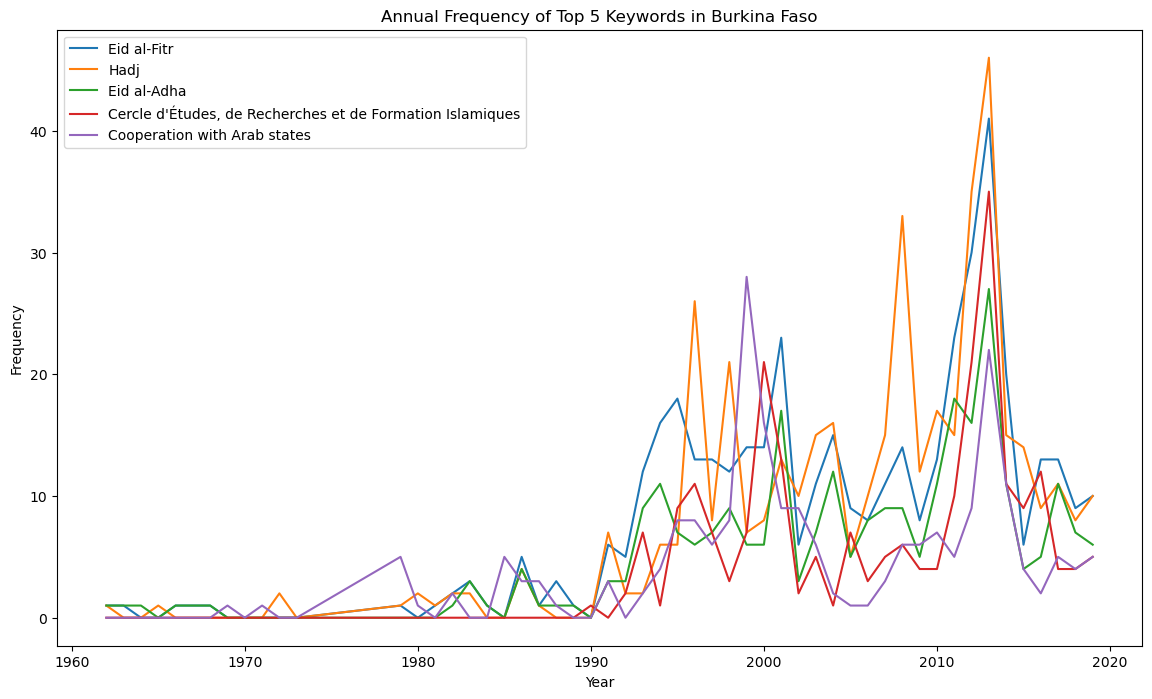

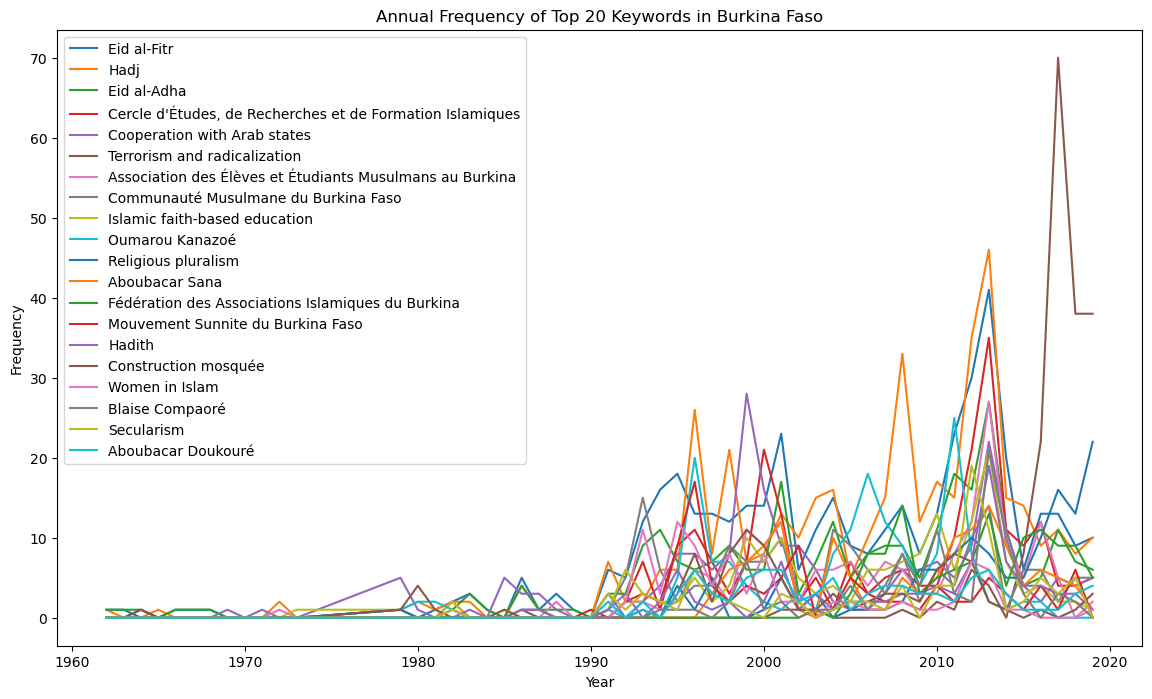

In [5]:
import ipywidgets as widgets
from IPython.display import display
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt

# Function to process data and generate the plot
def process_data(b=None):
    global selected_file_url, selected_num_keywords
    if selected_file_url and selected_num_keywords > 0:
        # Read the Excel file into a DataFrame
        df = pd.read_excel(selected_file_url, engine='openpyxl')

        # Convert the 'Date' column to datetime format
        df['Date'] = pd.to_datetime(df['Date'])

        # Extract the year from the 'Date' column and create a new column 'Year'
        df['Year'] = df['Date'].dt.year

        # Create a Counter object to hold the aggregated keywords
        keyword_counter = Counter()

        # Update the Counter object with keywords from each row
        for keywords in df['Keywords'].dropna():
            keyword_list = keywords.split(' | ')
            keyword_counter.update(keyword_list)

        # Get the most frequently occurring keywords
        most_common_keywords = [keyword for keyword, freq in keyword_counter.most_common(selected_num_keywords)]

        # Initialize a dictionary to hold the annual keyword frequencies
        annual_keyword_freq = {keyword: [] for keyword in most_common_keywords}

        # Loop through each year and count the occurrences of the most common keywords
        for year, group in df.groupby('Year'):
            yearly_counter = Counter()
            for keywords in group['Keywords'].dropna():
                keyword_list = keywords.split(' | ')
                yearly_counter.update(keyword_list)
            for keyword in most_common_keywords:
                annual_keyword_freq[keyword].append(yearly_counter.get(keyword, 0))

        # Create a DataFrame for the annual keyword frequencies
        annual_keyword_df = pd.DataFrame(annual_keyword_freq, index=df['Year'].unique())
        annual_keyword_df.sort_index(inplace=True)

        # Plot the annual keyword frequencies
        plt.figure(figsize=(14, 8))
        for keyword in most_common_keywords:
            plt.plot(annual_keyword_df.index, annual_keyword_df[keyword], label=keyword)

        # Determine the selected country for the title
        selected_country = 'Benin' if 'Benin' in selected_file_url else 'Burkina Faso'
        plt.title(f'Annual Frequency of Top {selected_num_keywords} Keywords in {selected_country}')
        plt.xlabel('Year')
        plt.ylabel('Frequency')
        plt.legend()

        # Show the figure
        plt.show()
    else:
        print("Please select a file and number of keywords from the dropdowns above.")

# URLs of the Excel files on GitHub
excel_urls = {
    'Benin': 'https://raw.githubusercontent.com/fmadore/Islam-West-Africa-Collection/main/Jupyter%20notebooks/Textual%20analysis/corpus_Benin.xlsx',
    'Burkina Faso': 'https://raw.githubusercontent.com/fmadore/Islam-West-Africa-Collection/main/Jupyter%20notebooks/Textual%20analysis/corpus_Burkina.xlsx'
}

# Dropdown widget for selecting the Excel file
excel_file_dropdown = widgets.Dropdown(
    options=excel_urls,
    description='Select File:',
    disabled=False,
)

# Slider widget for selecting the number of keywords
num_keywords_slider = widgets.IntSlider(
    value=10,
    min=1,
    max=20,
    step=1,
    description='Keywords:',
    disabled=False,
    continuous_update=False
)

# Button to trigger the processing
process_button = widgets.Button(description="Process Data")

# Global variables to store the selected file URL and number of keywords
selected_file_url = ''
selected_num_keywords = 10

# Handlers for widget events
def on_file_change(change):
    global selected_file_url
    selected_file_url = change['new']

def on_num_keywords_change(change):
    global selected_num_keywords
    selected_num_keywords = change['new']

# Attach the event handler to the button
process_button.on_click(process_data)

# Attach the event handlers to the widgets
excel_file_dropdown.observe(on_file_change, names='value')
num_keywords_slider.observe(on_num_keywords_change, names='value')

# Display the widgets and the button
display(excel_file_dropdown)
display(num_keywords_slider)
display(process_button)


The plot illustrates the annual frequency of the top X most common keywords in the selected corpus. This visualization allows us to observe several interesting trends:
+ **Variability**: Some keywords exhibit a more stable frequency over the years, while others show considerable fluctuations.
+ **Dominance**: Certain keywords consistently appear more frequently, suggesting their importance or prominence in the dataset.
+ **Temporal Shifts**: There may be years where specific keywords spike or dip, which could be indicative of broader socio-political or cultural changes.

For a more nuanced understanding, this analysis can be complemented with qualitative assessments or further quantitative measures.

## Compare multiple keywords
To compare multiple keywords over time, we can modify the existing code to allow for the selection of specific keywords of interest. In this code, replace the list **keywords_to_compare** with the specific keywords you wish to analyze. The plot will then show the annual frequencies of these selected keywords, allowing for a comparative analysis.
The list of keywords: **add on GitHub**
Replace **excel_url** with the corpus you want to use:
+ **Bénin**: https://raw.githubusercontent.com/fmadore/Islam-West-Africa-Collection/main/Jupyter%20notebooks/Textual%20analysis/corpus_Benin.xlsx
+ **Burkina Faso**:https://raw.githubusercontent.com/fmadore/Islam-West-Africa-Collection/main/Jupyter%20notebooks/Textual%20analysis/corpus_Burkina.xlsx

In [ ]:
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt

# URL of the Excel file on GitHub
excel_url = 'https://raw.githubusercontent.com/fmadore/Islam-West-Africa-Collection/main/Jupyter%20notebooks/Textual%20analysis/corpus_Benin.xlsx'

# Read the Excel file into a DataFrame
df = pd.read_excel(excel_url, engine='openpyxl')

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract the year from the 'Date' column and create a new column 'Year'
df['Year'] = df['Date'].dt.year

# Keywords to compare (replace these with the keywords you're interested in)
keywords_to_compare = ['Hadj', 'Women in Islam', 'Terrorism and radicalization', 'Cooperation with Arab states', 'Secularism', 'Islamic faith-based education', 'Religious pluralism']

# Initialize a dictionary to hold the annual keyword frequencies
annual_keyword_freq = {keyword: [] for keyword in keywords_to_compare}

# Loop through each year and count the occurrences of the specified keywords
for year, group in df.groupby('Year'):
    yearly_counter = Counter()
    for keywords in group['Keywords'].dropna():
        keyword_list = keywords.split(' | ')
        yearly_counter.update(keyword_list)
    for keyword in keywords_to_compare:
        annual_keyword_freq[keyword].append(yearly_counter.get(keyword, 0))

# Create a DataFrame for the annual keyword frequencies
annual_keyword_df = pd.DataFrame(annual_keyword_freq, index=df['Year'].unique())
annual_keyword_df.sort_index(inplace=True)

# Plot the annual keyword frequencies
plt.figure(figsize=(14, 8))
for keyword in keywords_to_compare:
    plt.plot(annual_keyword_df.index, annual_keyword_df[keyword], label=keyword)
plt.title('Annual Frequency of Selected Keywords')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.legend()

# Save the figure
plt.savefig('Annual_frequency_selected_keywords.png')
# Show the figure
plt.show()